In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

## ics exploration

In [25]:
ics = arepo.Snapshot(basepath+'ics/GSE4iso_fg0.7/lvl4/GSE_ICs.dat')

In [26]:
R = np.linalg.norm(ics.part0.pos[:,:2], axis=1)
z = ics.part0.pos[:,2]

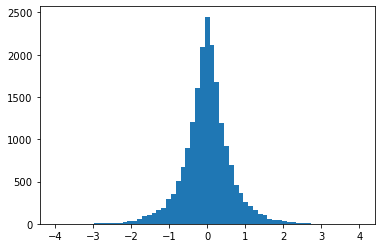

In [27]:
plt.hist(z, bins=np.linspace(-4, 4, 64));

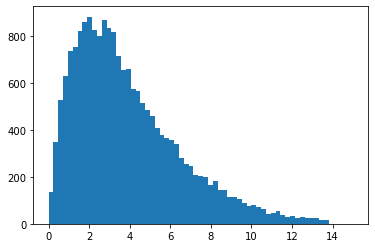

In [28]:
plt.hist(R, bins=np.linspace(0, 15, 64));

In [29]:
def bin_sfr(t, sfr, bin_width=0.01):
    bin_left = 0.0
    bin_right = bin_left + bin_width
    
    ave_sfr = []
    ave_t = []
    
    max_val = np.max(t)
    while bin_left < max_val:
        key = np.logical_and(t >=bin_left, t<bin_right)
        ave_sfr.append(np.mean(sfr[key]))
        ave_t.append(np.mean(t[key]))
        
        bin_left += bin_width
        bin_right += bin_width
        
    return np.array(ave_t), np.array(ave_sfr)

(0.0, 2.0)

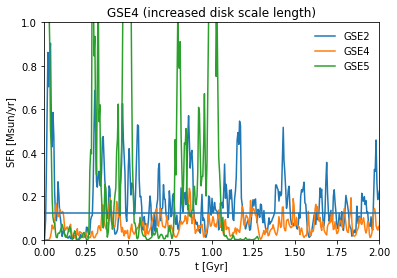

In [47]:
bin_width = 0.005

sfh_file_l3 = np.genfromtxt(basepath+'runs/GSE2iso_fg0.7/lvl4/output/sfr.txt')
time_l3, sfr_l3 = bin_sfr(sfh_file_l3[:,0], sfh_file_l3[:,2], bin_width=bin_width)
plt.plot(time_l3, sfr_l3, label='GSE2')

sfh_file_l3 = np.genfromtxt(basepath+'runs/GSE4iso_fg0.7/lvl4/output/sfr.txt')
time_l3, sfr_l3 = bin_sfr(sfh_file_l3[:,0], sfh_file_l3[:,2], bin_width=bin_width)
plt.plot(time_l3, sfr_l3, label='GSE4')

sfh_file_l3 = np.genfromtxt(basepath+'runs/GSE5iso_fg0.7/lvl4/output/sfr.txt')
time_l3, sfr_l3 = bin_sfr(sfh_file_l3[:,0], sfh_file_l3[:,2], bin_width=bin_width)
plt.plot(time_l3, sfr_l3, label='GSE5')

plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.title('GSE4 (increased disk scale length)')
# plt.axhline(10, c='k', ls='dashed')
# plt.axhline(15, c='k', ls='dashed')
plt.axhline(5E8/4E9)

plt.ylim(0, 1.0)
plt.xlim(0, 2)

In [38]:
sfr_l3

array([1.03476289, 3.52447446, 4.05148004, 3.03164148, 1.72726464,
       1.12209377, 0.9215469 , 0.52200873])